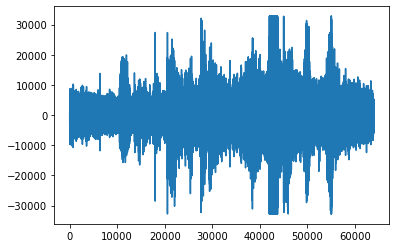

In [1]:
#importing the necessary modules
from scipy.fft import fft, ifft
from scipy.io import wavfile
import scipy
import numpy as np
import math
import matplotlib.pyplot as plt
#reading the .wav file of the original sample, nrate is the sampling rate, data contains all the samples
#nrate for the given wav file is 16,0000 samples per second
#the duration of the audio is 4 seconds and it has a total of 64,000 samples
nrate, ndata = wavfile.read(r'C:\\Users\Dell\Downloads\a2\test_noise.wav')
#reading the .wav file of the noise, nrate is the sampling rate, data contains all the samples
#nrate for the given wav file is 16,0000 samples per second
#the duration of the audio is 4 seconds and it has a total of 64,000 samples
noiserate,noisedata=wavfile.read(r'C:\\Users\Dell\Documents\noise.wav')
plt.plot(ndata)
plt.show()


In [2]:
#we are basically taking frames of 20 milliseconds each
#Since we have 16,000 samples per second, each frame will have 320 samples
framesize=math.floor(20*nrate/1000)
#print(framesize)
#We are choosing an overlap of 50% for our frames(160 samples), it means that first frame will be start from 0, next frame will
#start from 160 and so on
overlap=50
nover=math.floor(framesize*overlap/100)
#print(nover)
#number of frames to be processed=64000/160=400 frames, we need to process 400 frames
npro=math.floor(len(ndata)/(framesize-nover))
#print(npro)

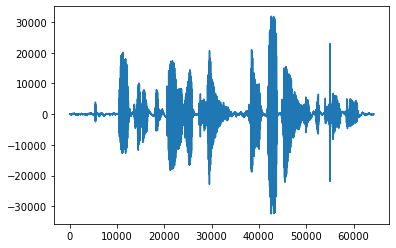

ParameterError: Audio data must be floating-point

In [3]:
#starting of each frame will be from the value of k, since the first frame starts from 0,
#therefore the initial value of k is 0.
k=0
#taking a hamming window for the frame
window=np.hamming(framesize)
#the list en will store all the frames in the end
en=[]
#processing all the frames except the last frame
for i in range(1,npro):
    #taking the window of the frame of the original sample
    winsig=window*ndata[k:k+framesize]
    #taking the window of the frame of the noise sample
    winnoi=window*noisedata[k:k+framesize]
    #calculating the discrete Fourier Transform of the speech and noise window
    speech_ft=fft(winsig)
    noise_ft=fft(winnoi)
    #magnitude of the FT
    mag=np.abs(speech_ft)
    #phase of the FT
    phase=np.angle(speech_ft)
    specsub=mag-(np.abs(noise_ft)) #applying spectral subtraction( original sample FT-noise estimate)
    #setting the value of zero where the difference is negative
    for m in range(0,len(specsub)):
        if(specsub[m]<0):
            specsub[m]=0
    #calculating the complex exponential from the modified magnitude and phase
    enft=(specsub)*np.exp(1.0j*phase)
    #calculating the inverse fourier transform 
    en.append(np.real(ifft(enft)))
    #increasing the value of k for the next frame to be processed
    k+=160
#processing the last frame, it will have the last 160 samples and then 160 zeroes
newdata=[]
for i in range(0,160):
    newdata.append(en[398][i])
for i in range(0,160):
    newdata.append(0)
en.append(newdata)
#creating a list of 64,000 zeroes which will store all the 64,000 modified samples
x_samples = [0]*64000
#reconstructing the modified signal using the overlap-add method
for ii in range(400):
    x_samples[ii*160 : ii*160 + 320] += en[ii]
#converting the list of samples into the 16 bit bit for wav file 
x_samples = np.array(x_samples, dtype=np.int16)
plt.plot(x_samples)
plt.show()
#writing onto the wav file
wavfile.write('test1c.wav',nrate,x_samples)
import librosa
X = librosa.stft(x_samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [5]:

# scipy.io.wavfile.write(x_samples, nrate, (x_samples * 32768).astype(np.int16))
# k=0
# window=np.hamming(framesize)
# en=[]
# for i in range(1,npro):
#     winsig=window*ndata[k:k+framesize]
#     winnoi=window*noisedata[k:k+framesize]
#     speech_ft=fft(winsig)
#     noise_ft=fft(winnoi)
#     mag=np.abs(speech_ft)
#     phase=np.angle(speech_ft)
#     #print(np.shape(mag))
#     specsub=mag**3-(np.abs(noise_ft))**3
#     for m in range(0,len(specsub)):
#         if(specsub[m]<0):
#             specsub[m]=0

#     enft=(specsub**(1/3))*np.exp(1.0j*phase)
#     en.append(np.real(ifft(enft)))
#     k+=160

#     newdata=[]
# for i in range(0,160):
#     newdata.append(en[398][i])
# for i in range(0,160):
#     newdata.append(0)
# en.append(newdata)
# #en=np.array(en)
# x_samples = [0]*64000
# i=0
# print(len(en[0]))
# for ii in range(400):
#     x_samples[ii*160 : ii*160 + 320] += en[ii]
# x_samples = np.array(x_samples, dtype=np.int16)
# wavfile.write('test1c.wav',nrate,x_samples)
# #scipy.io.wavfile.write(x_samples, nrate, (x_samples * 32768).astype(np.int16))

NameError: name 'scipy' is not defined

In [9]:

# m=np.mean(noisedata)
# k=0
# window=np.hamming(framesize)
# en=[]
# for i in range(1,npro):
#     winsig=window*ndata[k:k+framesize]
#     winnoi=window*noisedata[k:k+framesize]
#     m=np.mean(noisedata[k:k+320])
#     speech_ft=fft(winsig)
#     noise_ft=fft(winnoi)
#     mag=np.abs(speech_ft)
#     phase=np.angle(speech_ft)
#     specsub=mag-2*m
#     for m in range(0,len(specsub)):
#         if(specsub[m]<0):
#             specsub[m]=0

#     enft=(specsub)*np.exp(1.0j*phase)
#     en.append(np.real(ifft(enft)))
#     k+=160

#     newdata=[]
# for i in range(0,160):
#     newdata.append(en[398][i])
# for i in range(0,160):
#     newdata.append(0)
# en.append(newdata)
# #en=np.array(en)
# x_samples = [0]*64000
# i=0
# print(len(en[0]))
# for ii in range(400):
#     x_samples[ii*160 : ii*160 + 320] += en[ii]
# x_samples = np.array(x_samples, dtype=np.int16)
# wavfile.write('test1e.wav',nrate,x_samples)
# plt.plot(x_samples)
# plt.show()

NameError: name 'framesize' is not defined

In [7]:


# k=0
# window=np.hamming(framesize)
# en=[]
# for i in range(1,npro):
#     winsig=window*ndata[k:k+framesize]
#     winnoi=window*noisedata[k:k+framesize]
#     speech_ft=fft(winsig)
#     noise_ft=fft(winnoi)
#     mag=np.abs(speech_ft)
#     phase=np.angle(speech_ft)
#     #print(np.shape(mag))
#     specsub=mag**2-(np.abs(noise_ft))**2
#     for m in range(0,len(specsub)):
#         if(specsub[m]<0):
#             specsub[m]=0

#     enft=(specsub**0.5)*np.exp(1.0j*phase)
#     en.append(np.real(ifft(enft)))
#     k+=160

#     newdata=[]
# for i in range(0,160):
#     newdata.append(en[398][i])
# for i in range(0,160):
#     newdata.append(0)
# en.append(newdata)
# #en=np.array(en)
# x_samples = [0]*64000
# i=0
# print(len(en[0]))
# for ii in range(400):
#     x_samples[ii*160 : ii*160 + 320] += en[ii]
# x_samples = np.array(x_samples, dtype=np.int16)
# wavfile.write('test1c.wav',nrate,x_samples)
# #scipy.io.wavfile.write(x_samples, nrate, (x_samples * 32768).astype(np.int16))
    
    
    
    
    

In [8]:
import librosa